![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
bikes.groupby('season').total.describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [6]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [7]:
bikes.groupby('hour').total.describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


##### Analisis de datos 
Se conoce que la base de datos se trata de los datos correspondiente a la renta de bicicletas. La variable season es categorica pues, se puede divide en cuatro (siendo las 4 estaciones del año) siendo 1 invierno, 2 primavera, 3 verano y 4 otoño. La estación en la que más se renta es Verano y el que menos es Invierno. El número de rentas máx. que se presenta en verano es de 873 y siempre se renta en todas las estaciones 1 vez. 
Por otro lado, la variable hour el de mayor promedio se obtuvo a las 17 - 18 horas (5-6 pm). En este mismo rango se detecto que el número min renta es de 15 - 23 y máx. 970 - 977. De igual manera, se observa que se renta por los menos 1 entre el horario de 0 -7 am. Sin embargo, se puede identificar que de 7-9 existe un pico a las 10 baja y vuelve a subir de 11-18 cuando empieza a disminuir y vuelve un pico más bajo hasta las 23 (11 pm). 

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

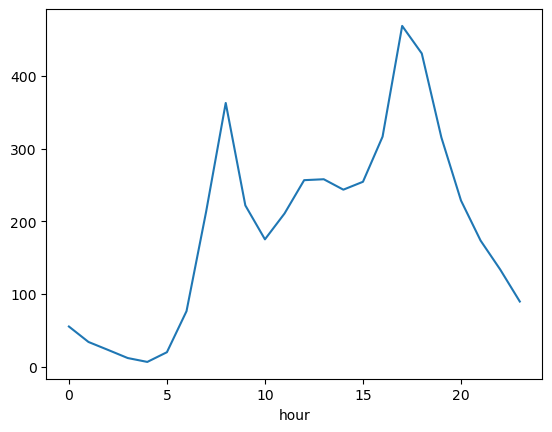

In [8]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

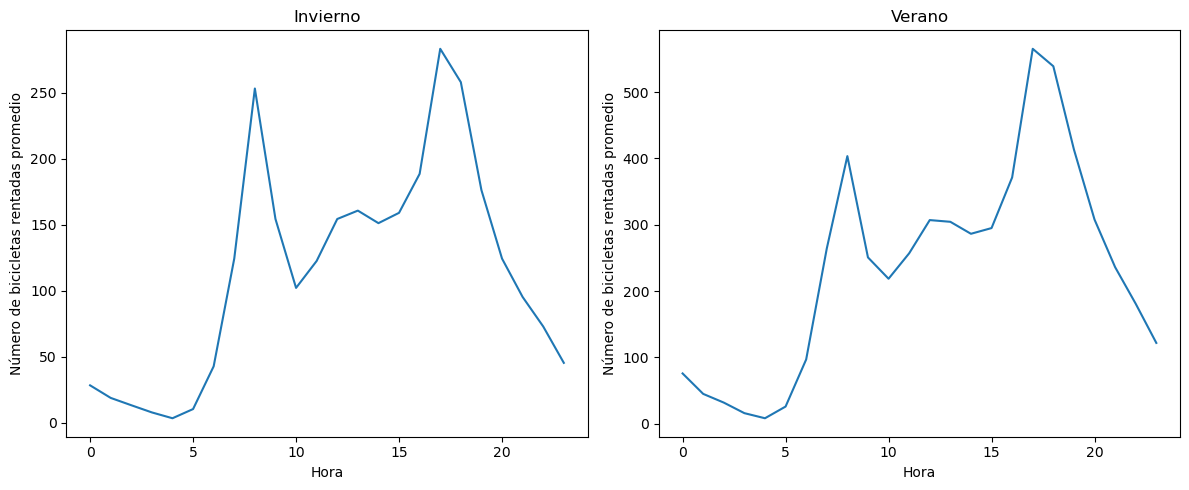

In [9]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
import matplotlib.pyplot as plt
# Filtrar los datos por invierno y verano
bikes_winter = bikes[bikes.season == 1]
bikes_summer = bikes[bikes.season == 3]

# Calcular la media del número de bicicletas rentadas por hora para invierno y verano
bikes_winter_hourly = bikes_winter.groupby('hour').total.mean()
bikes_summer_hourly = bikes_summer.groupby('hour').total.mean()

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Generar la gráfica para invierno
ax1.plot(bikes_winter_hourly.index, bikes_winter_hourly.values)
ax1.set_title('Invierno')
ax1.set_xlabel('Hora')
ax1.set_ylabel('Número de bicicletas rentadas promedio')

# Generar la gráfica para verano
ax2.plot(bikes_summer_hourly.index, bikes_summer_hourly.values)
ax2.set_title('Verano')
ax2.set_xlabel('Hora')
ax2.set_ylabel('Número de bicicletas rentadas promedio')

# Ajustar la figura y mostrar el resultado
fig.tight_layout()
plt.show()

##### Analisis de datos 
Se puede ve que el comportamiento de ambas gráficas es muy similar pues, hay dos momentos es el que existen dos picos marcados siempre a las 7-9 am y de 5-6 pm. Sin embargo, se puede evidenciar que los picos de verano son el doble de altos que los de invierno. Pero, el primer pico de invierno es más alto que el de verano gráficamente pero nonúmericamente. Esto puede ser por la hora en que se moviliza la gente para el trabajo. 

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [69]:
from sklearn.linear_model import LinearRegression

# Selección de variables predictoras
X = bikes[['season', 'hour']]
y = bikes['total']

# Creación del modelo de regresión lineal
model = LinearRegression().fit(X, y)

# Impresión de los coeficientes
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 2.584851334680991
Coefficients: [26.95130851 10.52129824]


In [71]:
# Evaluación del modelo con MSE
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print('MSE:', mse)

MSE: 26640.032544576763


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [12]:
# Selección de variables predictoras
feature_cols = ['hour', 'season']
X = bikes[feature_cols]
y = bikes['total']
feature_cols
X
y

datetime
2011-01-01 00:00:00     16
2011-01-01 01:00:00     40
2011-01-01 02:00:00     32
2011-01-01 03:00:00     13
2011-01-01 04:00:00      1
                      ... 
2012-12-19 19:00:00    336
2012-12-19 20:00:00    241
2012-12-19 21:00:00    168
2012-12-19 22:00:00    129
2012-12-19 23:00:00     88
Name: total, Length: 10886, dtype: int64

In [18]:
# Definición de parámetros y criterios de parada (6 número máx.)
max_depth = None
num_pct = 6
max_features = None
min_gain=0.001

# Impresión variable a usar 
j = 1
print(X.columns[j])


season


In [19]:
# División de la variable Season en num_pct puntos (parámetro definido anteriormente) para obtener posibles puntos de corte
splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
splits

array([1., 2., 3., 4.])

In [40]:
# División de las observaciones usando el punto de corte en la posición 6 de la lista de splits
k=3
filter_l = X.iloc[:, j] < splits[k]

# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
# y_l: la observación tiene un valor menor al punto de corte seleccionado
# y_r: la observación tiene un valor mayor o igual al punto de corte seleccionado
y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

In [41]:
# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

In [44]:
# Gini index de las observaciones que tienen un valor menor al punto de corte seleccionado
gini_l = gini(y_l)
gini_l

-71130.05508741661

In [45]:
# Gini index de las observaciones que tienen un valor mayor o igual al punto de corte seleccionado
gini_r = gini(y_r)
gini_r

-78794.70693090183

In [47]:
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [48]:
# Valor del total de la variable Season en el punto de corte selecionado
gini_impurity(X.iloc[:, j], y, splits[k])

36.87131846396369

In [49]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [50]:
# Obtención de la variable 'j', su punto de corte 'split' y su ganancia 'gain'
j, split, gain = best_split(X, y, 5)
j, split, gain

(0, 8.0, 18268.811823533004)

In [51]:
# División de las observaciones usando la mejor variable 'j' y su punto de corte 'split'
filter_l = X.iloc[:, j] < split

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

In [53]:
y.shape[0], y_l.shape[0], y_r.shape[0]

(10886, 3594, 7292)

In [54]:
y.mean(), y_l.mean(), y_r.mean()

(191.57413191254824, 55.437673900946024, 258.6715578716402)

In [55]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [56]:
# Aplicación de la función tree_grow
tree_grow(X, y, level=0, min_gain=0.001, max_depth=1, num_pct=10)

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [0, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': -1,
  'n_samples': 3594,
  'gain': 7207.700659959655},
 'sr': {'y_pred': 1,
  'y_prob': 258.6007677543186,
  'level': 1,
  'split': -1,
  'n_samples': 7292,
  'gain': 7392.920792160614}}

In [57]:
tree = tree_grow(X, y, level=0, min_gain=0.001, max_depth=3, num_pct=10)
tree

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [0, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': [0, 7.0],
  'n_samples': 3594,
  'gain': 7207.700659959655,
  'sl': {'y_pred': 1,
   'y_prob': 32.561604584527224,
   'level': 2,
   'split': [0, 6.0],
   'n_samples': 3139,
   'gain': 646.8008927589567,
   'sl': {'y_pred': 1,
    'y_prob': 25.15934475055845,
    'level': 3,
    'split': -1,
    'n_samples': 2684,
    'gain': 382.8088308604629},
   'sr': {'y_pred': 1,
    'y_prob': 75.92778993435448,
    'level': 3,
    'split': -1,
    'n_samples': 455,
    'gain': 743.095592335012}},
  'sr': {'y_pred': 1,
   'y_prob': 212.18599562363238,
   'level': 2,
   'split': [1, 2.0],
   'n_samples': 455,
   'gain': 5197.1071057533845,
   'sl': {'y_pred': 1,
    'y_prob': 122.27826086956522,
    'level': 3,
    'split': -1,
    'n_samples': 113,
    'gain': 0},
   'sr': {'y_pred': 1,
    'y_pr

In [59]:
# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'

def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted


In [62]:
# Ejecución de función tree_predict
tree1 = tree_predict(X, tree)
tree1

array([1., 1., 1., ..., 1., 1., 1.])

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [63]:
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

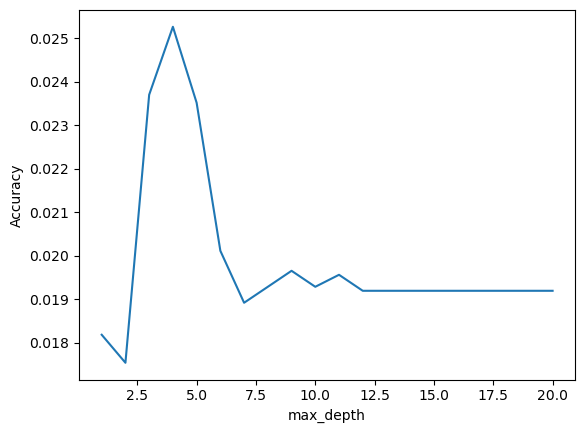

In [64]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [65]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.025261134067952253, 4)

In [66]:
# max_depth=4 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=4, random_state=1)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [67]:
# Uso de la función .feature_importances_ para obtener la importancia de cada variable
pd.DataFrame({'feature':feature_cols, 'importance':clf.feature_importances_}).sort_values('importance')

,feature,importance
1,season,0.206973
0,hour,0.793027


In [68]:
# Impresión de resultados de desemepeño del árbol de decisión
pd.Series(cross_val_score(clf, X, y, cv=10)).describe()

count    10.000000
mean      0.025261
std       0.006956
min       0.015611
25%       0.020436
50%       0.026183
75%       0.029865
max       0.034894
dtype: float64

In [72]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Selección de variables predictoras
X = bikes[['season', 'hour']]
y = bikes['total']

# Creación del modelo de árbol de decisión
clf = DecisionTreeRegressor(max_depth=4, random_state=1)
clf.fit(X, y)

# Evaluación del modelo con MSE
y_pred = clf.predict(X)
mse = mean_squared_error(y, y_pred)
print('MSE:', mse)

MSE: 15616.524498535658


Al comparar los MSE de ambos modelos se pudo detectar que resultado obtenido en el árbol de decisión 15616.52. Este valor es más bajo que el MSE obtenido con el modelo de regresión lineal anterior vs 26640.03, lo que indica que el modelo de árbol de decisión se ajusta mejor a los datos.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [73]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [74]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [75]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [76]:
#Librerias 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Árbol de decisión
dt = DecisionTreeClassifier(max_depth=4, random_state=1)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
print('Accuracy del árbol de decisión:', acc_dt)
print('F1-Score del árbol de decisión:', f1_dt)

# Regresión logística
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
print('Accuracy de la regresión logística:', acc_lr)
print('F1-Score de la regresión logística:', f1_lr)


Accuracy del árbol de decisión: 0.6513333333333333
F1-Score del árbol de decisión: 0.6345213137665969
Accuracy de la regresión logística: 0.6146666666666667
F1-Score de la regresión logística: 0.6110363391655451


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [77]:
# Primero se realizaran 100 arboles de decisión donde max_depth= 4 como se realizo en el punto anterior 
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=4)

bag_clf = BaggingClassifier(
    base_estimator=tree_clf, n_estimators=100,
    bootstrap=True, n_jobs=-1, random_state=1)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                  n_estimators=100, n_jobs=-1, random_state=1)

In [79]:
# Segundo se realizara 100 arboles de decisión donde min_samples_leaf =10
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=10)

bag_clf2 = BaggingClassifier(
    base_estimator=tree_clf2, n_estimators=100,
    bootstrap=True, n_jobs=-1, random_state=1)

bag_clf2.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=10),
                  n_estimators=100, n_jobs=-1, random_state=1)

In [81]:
# Tercero se realizaran 100 regresiones logisticas
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

bag_clf3 = BaggingClassifier(
    base_estimator=log_reg, n_estimators=100,
    bootstrap=True, n_jobs=-1, random_state=1)

bag_clf3.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100,
                  n_jobs=-1, random_state=1)

In [82]:
#Se evaluará cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score en los datos de prueba.

from sklearn.metrics import accuracy_score, f1_score

# Punto 1
y_pred = bag_clf.predict(X_test)
print("1 - Accuracy: ", accuracy_score(y_test, y_pred))
print("1 - F1-Score: ", f1_score(y_test, y_pred))

# Punto 2
y_pred2 = bag_clf2.predict(X_test)
print("2 - Accuracy: ", accuracy_score(y_test, y_pred2))
print("2 - F1-Score: ", f1_score(y_test, y_pred2))

# Punto 3
y_pred3 = bag_clf3.predict(X_test)
print("3 - Accuracy: ", accuracy_score(y_test, y_pred3))
print("3 - F1-Score: ", f1_score(y_test, y_pred3))


1 - Accuracy:  0.6546666666666666
1 - F1-Score:  0.6518817204301075
2 - Accuracy:  0.654
2 - F1-Score:  0.6569729015201586
3 - Accuracy:  0.6206666666666667
3 - F1-Score:  0.6158001350438893


In [84]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[('dt1', bag_clf), ('dt2', bag_clf2), ('lr', bag_clf3)], voting='hard', n_jobs=-1)

# Ajuste del ensamble
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('dt1',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                                                n_estimators=100, n_jobs=-1,
                                                random_state=1)),
                             ('dt2',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=10),
                                                n_estimators=100, n_jobs=-1,
                                                random_state=1)),
                             ('lr',
                              BaggingClassifier(base_estimator=LogisticRegression(),
                                                n_estimators=100, n_jobs=-1,
                                                random_state=1))],
                 n_jobs=-1)

In [85]:
# Evaluación del ensamble
from sklearn.metrics import accuracy_score, f1_score

y_pred = ensemble.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 0.654
F1-score: 0.6514439220953661


Revisando los resultados anteriores se puede determinar que el modelo de ensamble, se puede observar que su desempeño es similar al del modelo 2, con un valor de Accuracy de 0.654 y un valor de F1-Score de 0.6514439220953661. Por lo tanto, se puede concluir que el modelo ensamblado tiene un desempeño similar al del modelo 2, que fue el que obtuvo el mejor desempeño en términos de F1-Score

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [92]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

# Árbol de decisión con max_depth=4
tree1 = DecisionTreeClassifier(max_depth=4, random_state=1)
bagged_tree1 = BaggingClassifier(tree1, n_estimators=300, random_state=1)
bagged_tree1.fit(X_train, y_train)

# Árbol de decisión con min_samples_leaf=10
tree2 = DecisionTreeClassifier(min_samples_leaf=10, random_state=1)
bagged_tree2 = BaggingClassifier(tree2, n_estimators=300, random_state=1)
bagged_tree2.fit(X_train, y_train)

# Regresión logística con regularización L2
logreg = LogisticRegression(penalty='l2', C=1, random_state=1)
bagged_logreg = BaggingClassifier(logreg, n_estimators=300, random_state=1)
bagged_logreg.fit(X_train, y_train)


BaggingClassifier(base_estimator=LogisticRegression(C=1, random_state=1),
                  n_estimators=300, random_state=1)

In [93]:
from sklearn.ensemble import VotingClassifier

# Ensamble con votación ponderada
ensemble = VotingClassifier(estimators=[('tree1', bagged_tree1), ('tree2', bagged_tree2), ('logreg', bagged_logreg)], voting='soft', weights=[0.3, 0.3, 0.4])
ensemble.fit(X_train, y_train)


VotingClassifier(estimators=[('tree1',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                                                      random_state=1),
                                                n_estimators=300,
                                                random_state=1)),
                             ('tree2',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=10,
                                                                                      random_state=1),
                                                n_estimators=300,
                                                random_state=1)),
                             ('logreg',
                              BaggingClassifier(base_estimator=LogisticRegression(C=1,
                                                                                  random_state=1),
                    

In [94]:
from sklearn.metrics import accuracy_score, f1_score

# Evaluación de modelos individuales
y_pred_tree1 = bagged_tree1.predict(X_test)
acc_tree1 = accuracy_score(y_test, y_pred_tree1)
f1_tree1 = f1_score(y_test, y_pred_tree1)

y_pred_tree2 = bagged_tree2.predict(X_test)
acc_tree2 = accuracy_score(y_test, y_pred_tree2)
f1_tree2 = f1_score(y_test, y_pred_tree2)

y_pred_logreg = bagged_logreg.predict(X_test)
acc_logreg = accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

print("Accuracy y F1-Score de modelos individuales:")
print("1- Accuracy: {:.3f}, F1-Score: {:.3f}".format(acc_tree1, f1_tree1))
print("2- Accuracy: {:.3f}, F1-Score: {:.3f}".format(acc_tree2, f1_tree2))
print("3- Accuracy: {:.3f}, F1-Score: {:.3f}".format(acc_logreg, f1_logreg))

Accuracy y F1-Score de modelos individuales:
1- Accuracy: 0.652, F1-Score: 0.648
2- Accuracy: 0.661, F1-Score: 0.666
3- Accuracy: 0.619, F1-Score: 0.615


In [95]:
# Evaluación del ensamble
from sklearn.metrics import accuracy_score, f1_score

y_pred = ensemble.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 0.654
F1-score: 0.656518861681006


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

En el punto 7 los resultados fueron los siguientes:\
1 - Accuracy:  0.655, F1-Score:  0.652\
2 - Accuracy:  0.654, F1-Score:  0.657\
3 - Accuracy:  0.621, F1-Score:  0.616\
En el punto 8 los resultados fueron los siguientes: \
1- Accuracy: 0.652, F1-Score: 0.648\
2- Accuracy: 0.661, F1-Score: 0.666\
3- Accuracy: 0.619, F1-Score: 0.615\
Como se puede apreciar los resultados no fueron significativamente grandes si se comparan y si el procesamient duro más cuando se realizo con 300 bagged que si se realizara con 100. De igual manera, igual que en el punto 7, los resultados con respecto al ensamblaje se determina que es parecido al segundo modelo por los cual no tiene mayor diferencia. Se puede evidenciar que el número de bagged no determina mejor desempeño. 